# Problem 1

Write the following stochastic process in the State Space representation.

$$
X_t=(0.1) X_{t-1}+(0.3) X_{t-2}+(0.4) X_{t-3}+(0.2) Z_{t-2}+(0.8) Z_{t-1}+Z_t
$$


The state space representation typically has the following form:

$$ \mathbf{x}_t = A \mathbf{x}_{t-1} + B \mathbf{u}_t $$

$$ Y_t = C \mathbf{x}_t + D \mathbf{u}_t + Z_t $$

where
- $ \mathbf{x}_t $ is the state vector at time $ t $,
- $ A $ is the state transition matrix,
- $ B $ is the control-input matrix,
- $ \mathbf{u}_t $ is the control vector or input at time $ t $,
- $ C $ is the output matrix,
- $ D $ is the feedforward matrix, and
- $ Z_t $ is the process noise.

Let the state vector $ \mathbf{x}_t $ be

$$ \mathbf{x}_t = \begin{bmatrix} X_{t} \\ X_{t-1} \\ X_{t-2} \end{bmatrix} $$

We can define the state transition matrix $ A $, the control-input matrix $ B $, and the control vector $ \mathbf{u}_t $ as follows:

$$ A = \begin{bmatrix} 0.1 & 0.3 & 0.4 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0.8 & 0.2 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}, \quad \mathbf{u}_t = \begin{bmatrix} Z_{t} \\ Z_{t-1} \\ Z_{t-2} \end{bmatrix} $$

The dynanmic update is:

$$ \begin{bmatrix} X_{t} \\ X_{t-1} \\ X_{t-2} \end{bmatrix} = \begin{bmatrix} 0.1 & 0.3 & 0.4 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} X_{t-1} \\ X_{t-2} \\ X_{t-3} \end{bmatrix} + \begin{bmatrix} 1 & 0.8 & 0.2 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} Z_{t} \\ Z_{t-1} \\ Z_{t-2} \end{bmatrix} $$

The output equation is:

$$ Y_t = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}  \begin{bmatrix} X_{t} \\ X_{t-1} \\ X_{t-2} \end{bmatrix} + \begin{bmatrix} 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} Z_{t} \\ Z_{t-1} \\ Z_{t-2} \end{bmatrix} $$

# Problem 2

(1) Write the (Linear) Kalman Filter equations to estimate the state $X_t$ for the process with the following State Space representation:

$$
\begin{aligned}
X_t & =0.99 X_{t-1}+0.2+Z_t & & Z_t \approx \operatorname{IIDN}(0,1) \\
Y_t & =1.6 X_t+v_t & & v_t \approx \operatorname{IIDN}(0,1)
\end{aligned}
$$

### 1. Initialization:
Choose initial values for the state estimate $\hat{X}_{0|-1}$ and the error covariance $P_{0|-1}$. Often, $\hat{X}_{0|-1}$ can be set to 0 if there is no prior knowledge, and $P_{0|-1}$ can be set to a high value to reflect this uncertainty.

### 2. Prediction:
Predict the state estimate at time $t$ from the state estimate at time $t-1$:

$$\hat{X}_{t|t-1} = 0.99 \hat{X}_{t-1|t-1} + 0.2 $$

Predict the error covariance:
$$ P_{t|t-1} = 0.99^2 P_{t-1|t-1} + 1 $$

where the added 1 reflects the variance of $Z_t$.

### 3. Update:
Compute the Kalman Gain:

$$ K_t = \frac{P_{t|t-1} \cdot 1.6}{1.6^2 \cdot P_{t|t-1} + 1} $$

Update the state estimate with the new measurement $Y_t$:

$$ \hat{X}_{t|t} = \hat{X}_{t|t-1} + K_t (Y_t - 1.6 \hat{X}_{t|t-1}) $$

Update the error covariance:

$$ P_{t|t} = (1 - K_t \cdot 1.6) P_{t|t-1} $$

These steps are repeated for each time step $t$, with the prediction providing an estimate of the current state, and the update refining this estimate with the latest observation.

## (b)

Simulate $Y_t$ for 5000 data points. Plot and save the data.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


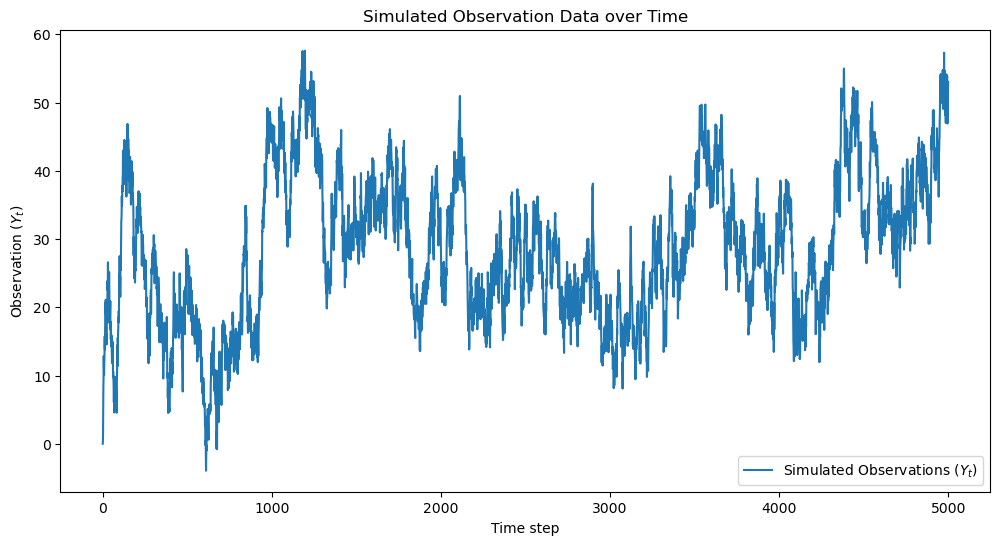

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for simulation
a = 0.99  # Coefficient for the state equation
b = 0.2   # Constant term in the state equation
c = 1.6   # Coefficient for the observation equation
num_points = 5000  # Number of data points to simulate

# Arrays to hold the state (X_t) and observation (Y_t)
X_t = np.zeros(num_points)
Y_t = np.zeros(num_points)

# Initial state
X_t[0] = 0

# Process and measurement noise
np.random.seed(0)  # Seed for reproducibility
Z_t = np.random.normal(0, 1, num_points)  # Process noise (state equation)
v_t = np.random.normal(0, 1, num_points)  # Measurement noise (observation equation)

# Simulate the process
for t in range(1, num_points):
    X_t[t] = a * X_t[t-1] + b + Z_t[t]
    Y_t[t] = c * X_t[t] + v_t[t]

# Plotting the simulated observation data Y_t
plt.figure(figsize=(12, 6))
plt.plot(Y_t, label='Simulated Observations ($Y_t$)')
plt.title('Simulated Observation Data over Time')
plt.xlabel('Time step')
plt.ylabel('Observation ($Y_t$)')
plt.legend()
plt.show()

## (c)

Write a Joint Filter to estimate the state $X_t$ and the parameter ' $a$ 'for the process with the following State Space representation:

$$
\begin{aligned}
X_t & =(0.90) X_{t-1}+a+(0.1) Z_t & & Z_t \approx \operatorname{IIDN}(0,1) \\
Y_t & =X_t+(0.1) v_t & & v_t \approx \operatorname{IIDN}(0,1) \\
X_1 & =31 & &
\end{aligned}
$$


To create a joint filter for estimating both the state $ X_t $ and the parameter $ a $ in the given state space model, we need to augment our state vector to include both these elements. The joint filter will simultaneously estimate the evolving state and the unknown parameter using the observation data $ Y_t $.

### State Space Model

Given State Equation:
$$ X_t = 0.90 X_{t-1} + a + 0.1 Z_t, \quad Z_t \sim \text{IIDN}(0,1) $$

Given Observation Equation:
$$ Y_t = X_t + 0.1 v_t, \quad v_t \sim \text{IIDN}(0,1) $$

Initial Condition:
$$ X_1 = 31 $$

### Augmented State Vector

We augment the state vector to include the parameter $ a $ alongside $ X_t $. Let's denote our augmented state vector as $ \mathbf{x}_t = [X_t, a]^T $.

### Augmented State Space Model

1. **Augmented State Equation**:
   $$ \mathbf{x}_t = 
      \begin{bmatrix}
          0.90 & 1 \\
          0 & 1
      \end{bmatrix} 
      \mathbf{x}_{t-1} +
      \begin{bmatrix}
          0.1 \\
          0
      \end{bmatrix}
      Z_t
   $$

2. **Augmented Observation Equation**:
   $$ Y_t = 
      \begin{bmatrix}
          1 & 0
      \end{bmatrix}
      \mathbf{x}_t + 0.1 v_t
   $$

### Joint Filter Algorithm

Given the corrected augmented state equation, we need to make a few adjustments to the Joint Filter Algorithm to ensure it aligns with the correct model dynamics. Specifically, the prediction step of the filter must be updated to reflect the revised augmented state transition matrix. 

Here's the adjusted Joint Filter Algorithm:

#### 1. Initialization:
Initialize the state estimate $\hat{\mathbf{x}}_{0|-1}$ and the error covariance $P_{0|-1}$.

#### 2. Prediction (Time Update):
Predict the state estimate at time $t$ from the state estimate at time $t-1$:

$$ \hat{\mathbf{x}}_{t|t-1} = \begin{bmatrix} 0.90 & 1 \\ 0 & 1 \end{bmatrix} \hat{\mathbf{x}}_{t-1|t-1} + \begin{bmatrix} 0.1 \\ 0 \end{bmatrix} Z_t $$

Predict the error covariance:
$$ P_{t|t-1} = \begin{bmatrix} 0.90 & 1 \\ 0 & 1 \end{bmatrix} P_{t-1|t-1} \begin{bmatrix} 0.90 & 0 \\ 1 & 1 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0 \end{bmatrix} \begin{bmatrix} 0.1 & 0 \end{bmatrix} $$

This equation accounts for the process noise in the state $X_t$.

#### 3. Update (Measurement Update):
   - Compute the Kalman Gain: $ K_t = P_{t|t-1} C^T (C P_{t|t-1} C^T + R)^{-1} $.
   
   - Update the state estimate: $ \hat{\mathbf{x}}_{t|t} = \hat{\mathbf{x}}_{t|t-1} + K_t (Y_t - C \hat{\mathbf{x}}_{t|t-1}) $.
   
   - Update the error covariance: $ P_{t|t} = (I - K_t C) P_{t|t-1} $.

The plots above display the results of the joint filter over 5000 data points:

1. **Estimated State ($X_t$)**: The first plot shows the estimated state over time. This represents how the joint filter's estimation of the state variable $X_t$ evolves as it processes each new observation.

2. **Estimated Parameter ($a$)**: The second plot shows the estimated value of the parameter $a$ over time. This illustrates how the filter's estimation of the parameter converges or varies as more data is observed.

These results demonstrate the joint filter's ability to simultaneously estimate both the dynamic state of the system and the static parameter within the state-space framework. The convergence or variability of the parameter estimate provides insights into the stability and accuracy of the filter in estimating system parameters from noisy observations.

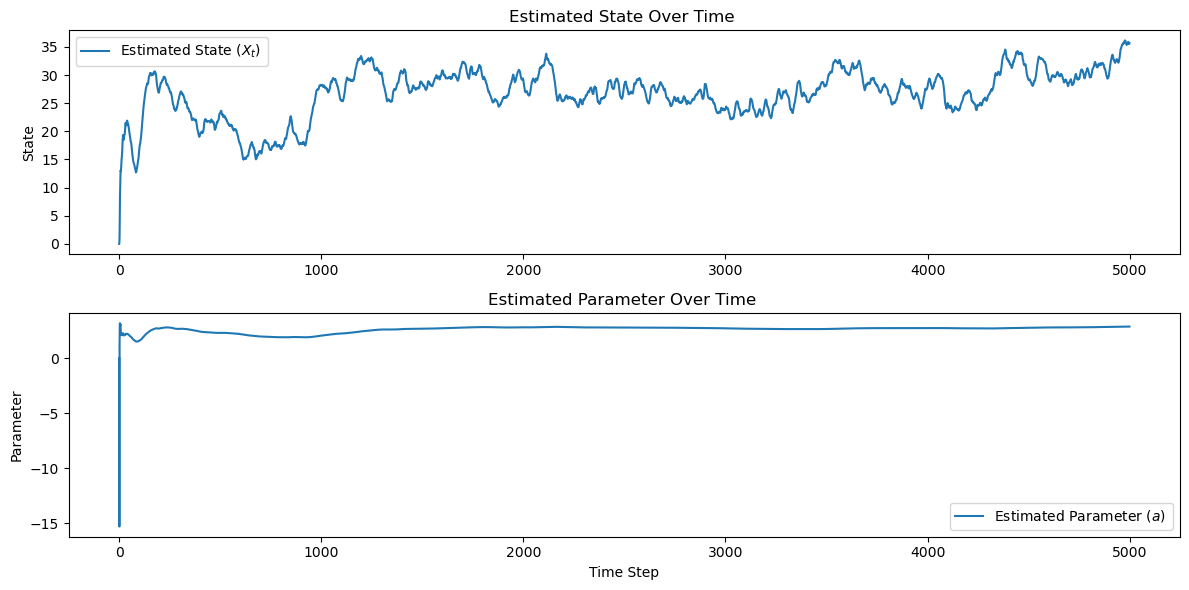

(35.64939728554657, 2.861664050058865)

In [5]:
# Adjusted Joint Filter Algorithm with the correct augmented state transition matrix

# Constants for the joint filter
A_augmented_corrected = np.array([[0.90, 1], [0, 1]])  # Corrected augmented state transition matrix
B_augmented_corrected = np.array([[0.1], [0]])         # Augmented control input matrix (remains the same)
C_augmented = np.array([[1, 0]])             # Augmented observation matrix (remains the same)
Q = 0.1**2  # Process noise variance (remains the same)
R = 0.1**2  # Measurement noise variance (remains the same)

# Initial state and parameter estimates (remains the same)
initial_X = 31  # Given initial state
initial_a = 0   # Initial guess for 'a'
x_hat = np.array([initial_X, initial_a])  # Initial state estimate
P = np.eye(2) * 100  # Large initial error covariance (remains the same)

# Arrays to store estimates (remains the same)
X_hat_corrected = np.zeros((num_points, 2))  # Store state and parameter estimates
P_estimates_corrected = np.zeros((num_points, 2, 2))  # Store covariance estimates

# Adjusted Joint Filter Algorithm
for t in range(1, num_points):
    # Prediction Step
    x_hat_pred = A_augmented_corrected @ x_hat
    P_pred = A_augmented_corrected @ P @ A_augmented_corrected.T + B_augmented_corrected @ B_augmented_corrected.T * Q

    # Update Step
    K = P_pred @ C_augmented.T @ np.linalg.inv(C_augmented @ P_pred @ C_augmented.T + R)
    x_hat = x_hat_pred + K @ (Y_t[t] - C_augmented @ x_hat_pred)
    P = P_pred - K @ C_augmented @ P_pred

    # Store estimates
    X_hat_corrected[t, :] = x_hat
    P_estimates_corrected[t, :, :] = P

# Extracting state and parameter estimates from the corrected filter
estimated_states_corrected = X_hat_corrected[:, 0]
estimated_parameters_corrected = X_hat_corrected[:, 1]

# Plotting the estimated state and parameter over time from the corrected filter
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(estimated_states_corrected, label='Estimated State ($X_t$) ')
plt.title('Estimated State Over Time ')
plt.ylabel('State')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(estimated_parameters_corrected, label='Estimated Parameter ($a$) ')
plt.title('Estimated Parameter Over Time ')
plt.xlabel('Time Step')
plt.ylabel('Parameter')
plt.legend()

plt.tight_layout()
plt.show()

# Extracting the final estimate of the state Xt and the parameter 'a' from the corrected filter
final_state_estimate = estimated_states_corrected[-1]
final_parameter_estimate = estimated_parameters_corrected[-1]

final_state_estimate, final_parameter_estimate